In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image = X_train[0]

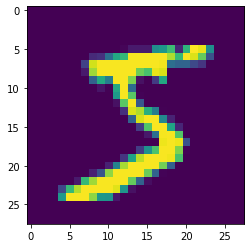

In [7]:
plt.imshow(single_image)

## Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [10]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [26]:
y_cat_train.shape

(60000, 10)

## Normalizing

In [12]:
X_train=X_train / 255.0
X_test=X_test / 255.0

## Reshaping

In [13]:
X_train.shape

(60000, 28, 28)

In [33]:
# batch_size, width, heigth, color_channels
X_train = X_train.reshape(60000,28,28,1)

In [34]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
# batch_size, width, heigth, color_channels
X_test = X_test.reshape(10000,28,28,1)

In [36]:
X_test.shape

(10000, 28, 28, 1)

# Model

In [27]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [37]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [41]:
history = model.fit(X_train, y_cat_train, epochs = 10, validation_data = (X_test, y_cat_test), callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0367 - val_accuracy: 0.9883


In [42]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

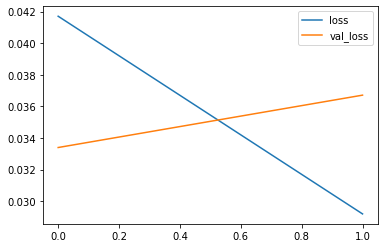

In [45]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

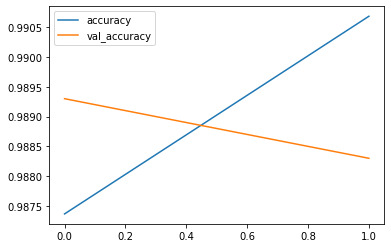

In [46]:
metrics[['accuracy', 'val_accuracy']].plot()

In [47]:
model.evaluate(X_test, y_cat_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.0367 - accuracy: 0.9883


[0.03670887161091668, 0.9883]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
predictions = model.predict_classes(X_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.96      1.00      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test,predictions)

array([[ 971,    1,    2,    0,    0,    0,    5,    1,    0,    0],
       [   0, 1131,    1,    0,    0,    1,    2,    0,    0,    0],
       [   1,    1, 1030,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    3, 1002,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    3,    0,  888,    1,    0,    0,    0],
       [   1,    2,    1,    0,    1,    5,  947,    0,    1,    0],
       [   0,    3,   29,    0,    1,    0,    0,  994,    0,    1],
       [   1,    0,    4,    2,    0,    7,    2,    0,  956,    2],
       [   0,    1,    1,    2,    9,    8,    0,    4,    2,  982]],
      dtype=int64)

In [57]:
import seaborn as sns

<AxesSubplot:>

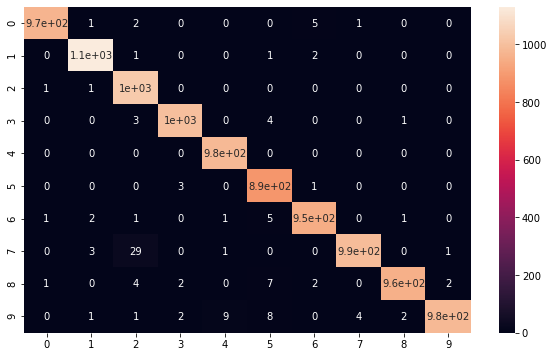

In [58]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)